B: 0.11699999999999999
C: 0.167


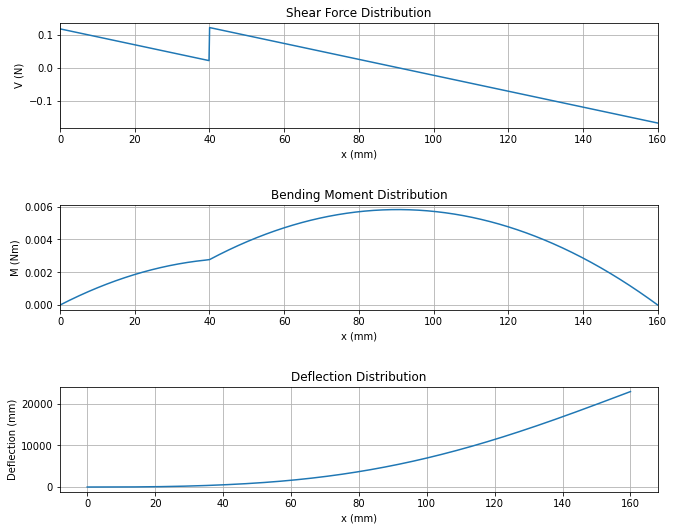

<Figure size 432x288 with 0 Axes>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz

b = 1 * 10**-3
F = 0.1   # N
p = 2.4 * 10**3 * b  # kPa * 160 mm => 선압력으로 변환
L = 160 * 10**-3
l1 = 40 * 10**-3  # mm
l2 = L - l1 

B = -l2 / L * F + p * (l1 + l2) / 2
C = -l1 / L * F + p * (l1 + l2) / 2

xl = np.linspace(0, 160, 1000)* 10**-3
V = np.where(xl < l1, B - p * xl, B + F - p * xl)

# 모멘트 계산
M_array = cumtrapz(V, xl, initial=0)

# Parameters
h = 0.2 * 10**-3
E = 2.82e9  # Pa
I = (b * h**3) / 12
L = 160e-3  # m

# 처짐 분포 계산
theta_array = cumtrapz(M_array / (E * I), xl, initial=0) # 처음 기울기 계산
deflection_array = cumtrapz(theta_array, xl, initial=0) # 처짐 계산


plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(xl * 10**3, V)
plt.xlabel('x (mm)')
plt.ylabel('V (N)')
#plt.ylim(0,-1)
plt.xlim(0,160)
plt.title('Shear Force Distribution')
plt.grid(True)

print('B:',B)
print('C:',C)

plt.subplot(3, 1, 2)
plt.plot(xl * 10**3, M_array)
plt.xlabel('x (mm)')
plt.ylabel('M (Nm)')
plt.xlim(0,160)
plt.title('Bending Moment Distribution')
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(xl * 10**3, deflection_array * 10**3)
plt.xlabel('x (mm)')
plt.ylabel('Deflection (mm)')
plt.title('Deflection Distribution')
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()


plt.tight_layout(pad=3.0) # pad 매개변수를 조절하여 서브플롯 사이의 간격을 제어

plt.show()


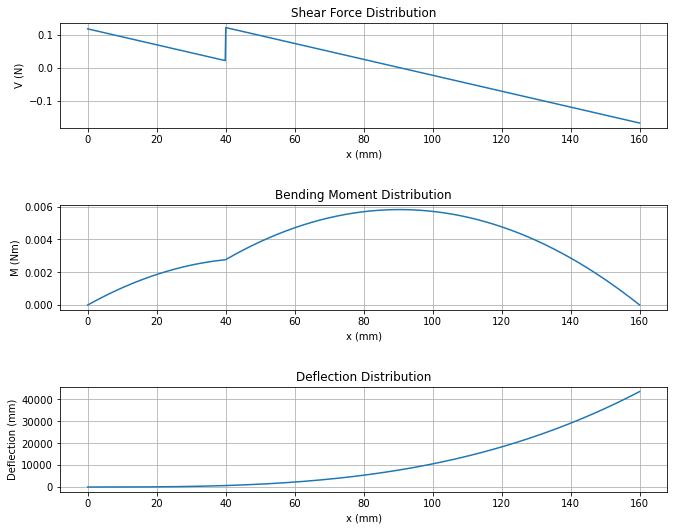

In [35]:
from scipy.integrate import odeint

# 미분방정식 시스템 정의
def beam_ode(y, x):
    w, theta, M, V = y
    dwdx = theta
    dthetadx = M / (E * I)
    dMdx = V
    dVdx = interp_V(x) # 전단력 분포를 위해 보간
    return [dwdx, dthetadx, dMdx, dVdx]

# 전단력을 보간하기 위한 함수
interp_V = interp1d(xl, V, kind='cubic', fill_value="extrapolate")

# 초기값 및 경계조건
init_cond = [0, 0, M_array[0], V[0]]
sol = odeint(beam_ode, init_cond, xl)

# 결과 그래프
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(xl * 10**3, V)
plt.xlabel('x (mm)')
plt.ylabel('V (N)')
plt.title('Shear Force Distribution')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(xl * 10**3, M_array)
plt.xlabel('x (mm)')
plt.ylabel('M (Nm)')
plt.title('Bending Moment Distribution')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(xl * 10**3, sol[:, 0] * 10**3)
plt.xlabel('x (mm)')
plt.ylabel('Deflection (mm)')
plt.title('Deflection Distribution')
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()
